<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [10]:
# Filter the data for November and December
df = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

#df.head()

# Calculate purchase rates by customer type
purchase_count = df.groupby('CustomerType')['Purchase'].value_counts()

# Total number of session by CustomerType
total_new_customer = np.sum(purchase_count['New_Customer'])
total_returning_customer = np.sum(purchase_count['Returning_Customer'])

# Total number of purchase by CustomerType
purchase_new_customer = purchase_count[('New_Customer', 1)]
purchase_returning_customer = purchase_count[('Returning_Customer', 1)]

# Calculate purchase rates
purchase_rate_new = purchase_new_customer / total_new_customer
purchase_rate_returning = purchase_returning_customer / total_returning_customer

# Therefore, the online purchase for the returning customers is lower than that of the new customers.
purchase_rates = {"Returning_Customer": purchase_rate_returning, "New_Customer": purchase_rate_new}
print(purchase_rates)

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


In [11]:
# Identify the strongest correlation in total time spent between different types of pages visited by the returning customers during the months of November and December. 

# Calculating correlation with pandas
cor_admin_info = df['Administrative_Duration'].corr(df['Informational_Duration'])
cor_admin_product = df['Administrative_Duration'].corr(df['ProductRelated_Duration'])
cor_product_info = df['ProductRelated_Duration'].corr(df['Informational_Duration'])

print(cor_admin_info)
print(cor_admin_product)
print(cor_product_info)

# Store top correlation
top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_product}
print(top_correlation)

0.24468855792839267
0.3898546003206963
0.36712552534442133
{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.3898546003206963}


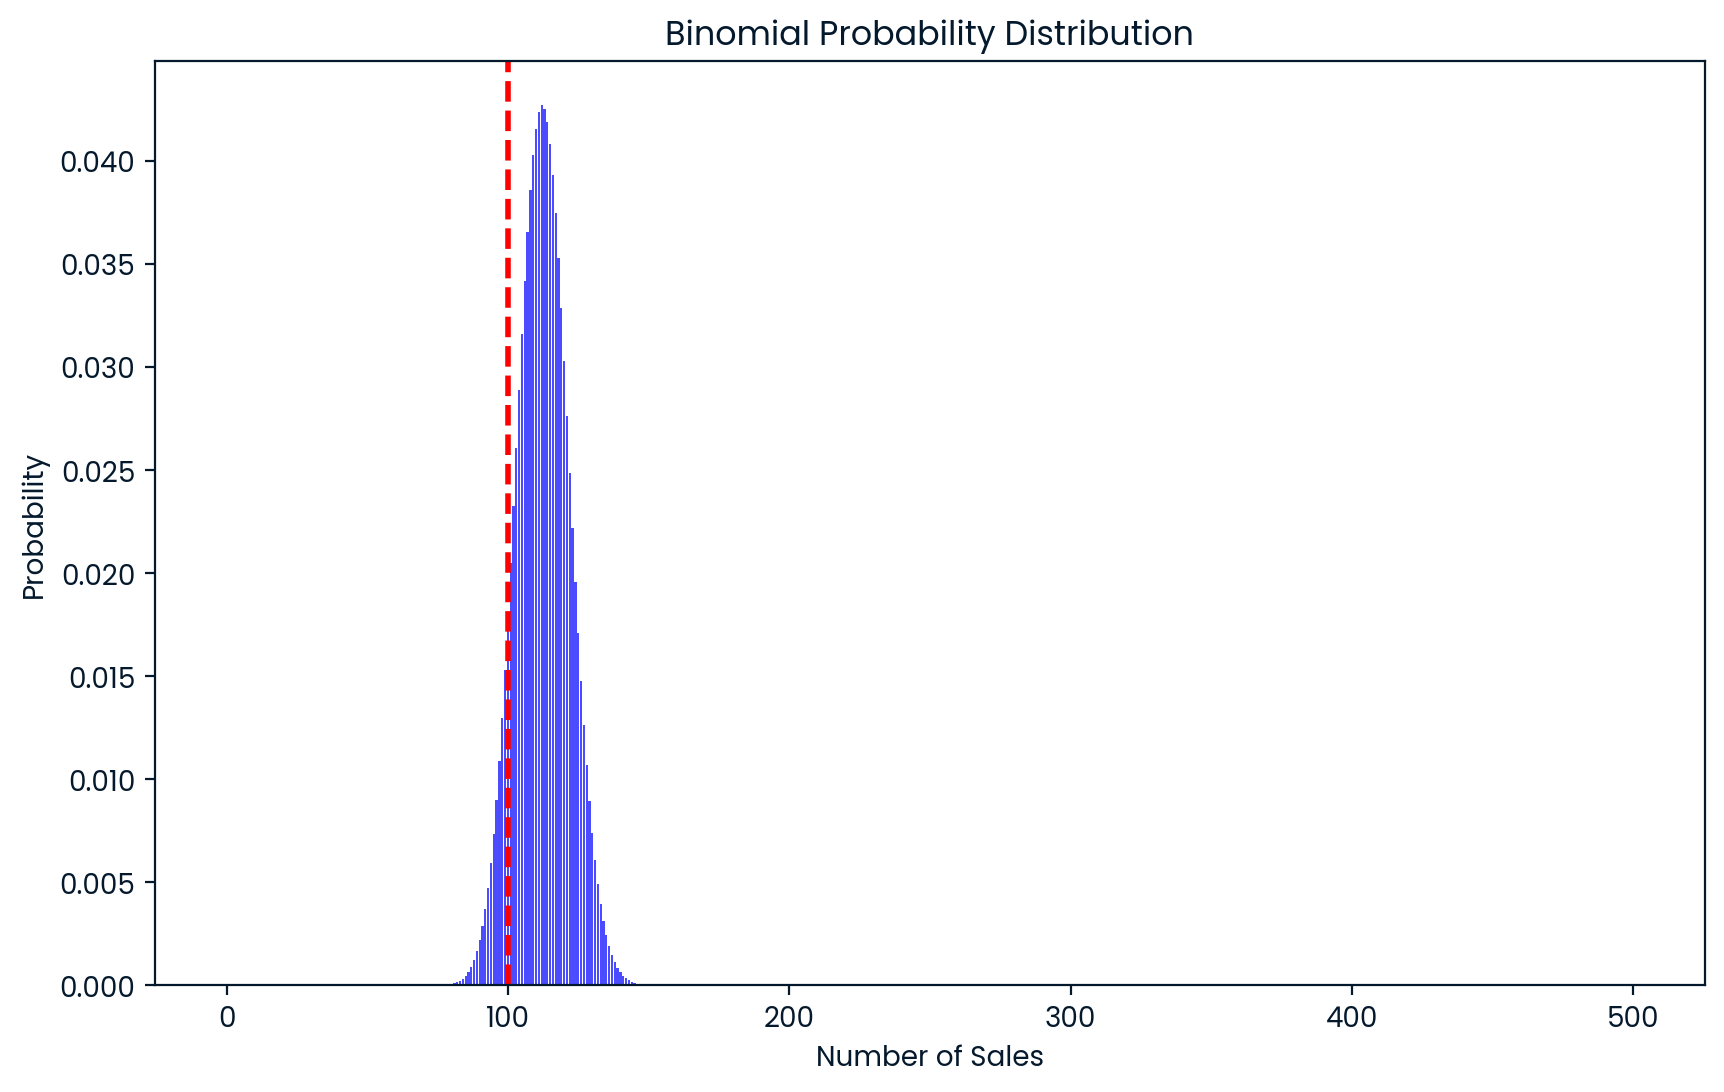

0.9190464150313482

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Current purchase rate for returning customers
current_purchase_rate = purchase_rates["Returning_Customer"]

# Boosted purchase rate
boosted_purchase_rate = current_purchase_rate * 1.15

# Number of trials (online shopping sessions)
n_trials = 500

# Number of successes (sales)
k_successes = 100

# Calculate the probability of at least 100 sales
prob_at_least_100_sales = 1 - binom.cdf(k_successes - 1, n_trials, boosted_purchase_rate)

# Plot the binomial probability distribution
x = np.arange(0, n_trials + 1)
y = binom.pmf(x, n_trials, boosted_purchase_rate)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='blue', alpha=0.7)
plt.axvline(k_successes, color='red', linestyle='dashed', linewidth=2)
plt.title('Binomial Probability Distribution')
plt.xlabel('Number of Sales')
plt.ylabel('Probability')
plt.show()

prob_at_least_100_sales